In [113]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
import torch

In [114]:
class plot_diagram():

    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values]
        w.data = start

    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        plt.plot(self.parameter_values.detach().numpy(), self.Loss_function)
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()

    # Destructor
    def __del__(self):
        plt.close('all')

In [115]:
X = torch.arange(-3, 3,0.1).view(-1,1)
f = -3 * X

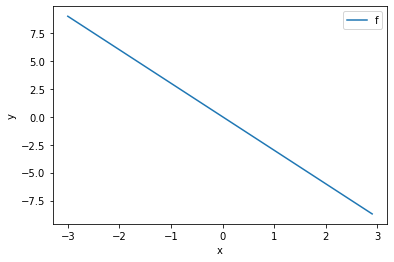

In [116]:
plt.plot(X.numpy(), f.numpy(), label='f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [117]:
#Add noise.
Y = f + 0.1 * torch.randn(X.size())

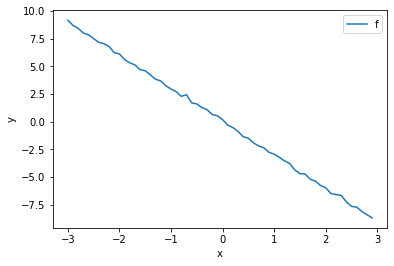

In [118]:
plt.plot(X.numpy(), Y.numpy(), label='f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [119]:
def forward(x):
    return w * x

In [120]:
def criterion(yhat, y):
    return torch.mean((yhat-y)**2)

In [121]:
lr = 0.1
LOSS=[]

In [122]:
w = torch.tensor(-10.0, requires_grad=True)
gradient_plot = plot_diagram(X, Y, w, stop = 5)

In [123]:
def train_model(iter):
    for epoch in range(iter):
        Yhat = forward(X)
        loss = criterion(Yhat, Y)
        LOSS.append(loss.item())
        loss.backward()
        w.data = w.data - lr * (w.grad.data)
        w.grad.data.zero_()

In [124]:
train_model(4)

Text(23.875, 0.5, 'Cost')

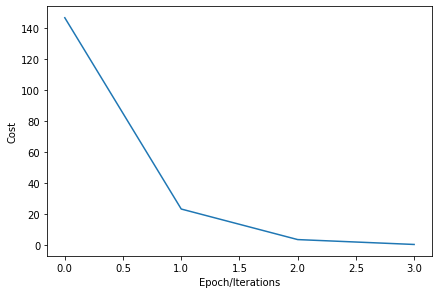

In [125]:
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

In [142]:
w = torch.tensor(-15.0, requires_grad=True)
LOSS2=[]

def myTrainModel(itr):
    for epoch in range(itr):
        yHat = forward(X)
        loss = criterion(yHat, Y)
        LOSS2.append(loss.detach().numpy())
        loss.backward()
        w.data = w.data - lr * w.grad.data
        w.grad.data.zero_()

In [143]:
myTrainModel(4)

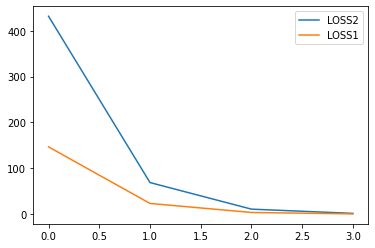

In [147]:
plt.plot(LOSS2, label="LOSS2")
plt.plot(LOSS, label="LOSS1")
plt.legend()